<a href="https://colab.research.google.com/github/Rlackdals981010/ai_Study/blob/master/self_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#3-2 선형회귀 linear regression
#k-이웃은 범위 밖 샘플에 대해 예측이 힘듦

In [ ]:
#2차원에서 선형 -> 1차 방정식을 사용
#샘플들과 유사한 직선의 방정식을 찾는게 선형 회귀

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [5]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [8]:
train_input,test_input,train_target,test_target = train_test_split(perch_length,perch_weight,random_state=42)
#reshape : 1차원 배열을 행:샘플, 열:특성으로 나열하는 2차원 배열로 바꿔주는 기능을 함. 2번 매개변수 : 1 -> 열 1개, 1번 매개변수 : 행방향 개수 -1 -> 남은 차원 다 사용
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)


In [10]:
lr = LinearRegression()
lr.fit(train_input,train_target)
print(lr.predict([[50]]))

[1241.83860323]


In [11]:
print(lr.coef_,lr.intercept_) #기울기, y절편    y=coef_*x + intercept

[39.01714496] -709.0186449535477


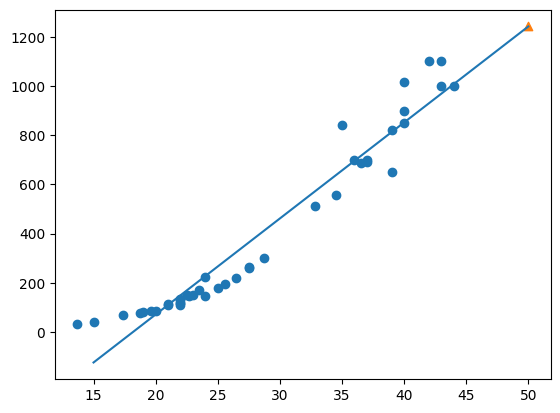

In [19]:
plt.scatter(train_input,train_target) #산점도
plt.plot([15,50],[15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])#1차 방정식
plt.scatter(50,1241.8,marker='^') #농어 데이터
plt.show()

In [22]:
print(lr.score(train_input,train_target))
print(lr.score(test_input,test_target))

0.939846333997604
0.8247503123313558


In [28]:
###성능 개선하기!
#1. 과소/대 적합된거 같음
#2. 음수에서 그래프가 시작 -> 어색함
#다항 회귀 -> 2차 방정식 y = a*길이^2 + b * 길이 + c
train_poly = np.column_stack((train_input**2,train_input))
test_poly = np.column_stack((test_input**2,test_input))
lr = LinearRegression()
lr.fit(train_poly,train_target)
print(lr.predict([[50**2,50]]))
print(lr.coef_,lr.intercept_)

[1573.98423528]
[  1.01433211 -21.55792498] 116.0502107827827


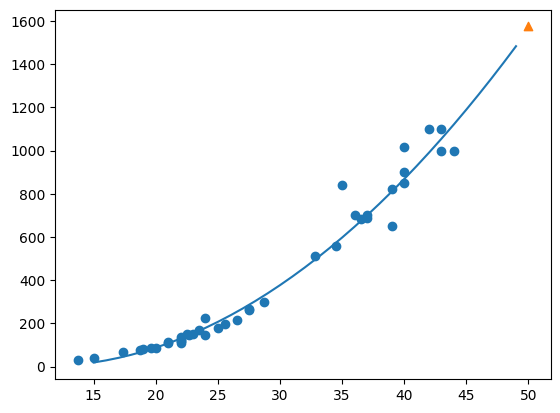

In [30]:
point = np.arange(15,50) #구간별 직선을 위해 15~49 정수배열 만들기
plt.scatter(train_input,train_target) #훈련 세트의 산점도
plt.plot(point,1.01*point**2 - 21.6*point + 116.06) # 15~49 2차 방정식 그래프 그리기
plt.scatter([50],[1574],marker='^') #50cm 농어 데이터
plt.show()

In [31]:
print(lr.score(train_poly,train_target))
print(lr.score(test_poly,test_target))
#지금은 length만 고려해서 그래프로 확인하지만, 고려할 특성이 많아지면 이와같은 score만 사용해서 판단해야함.

0.9706807451768623
0.9775935108325122
